

# Project: No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

  The No_show appointment dataset contains information from medical appointments in Brazil. The dataset is focused on whether or not patients show up for their appointment.

#### Columns present in the dataset include :
- Patientid
- Appointmentid
- Gender: The sex of the patient.
- Scheduleday: tells us on what day the patient set up their appointment.
- Apointmentday
- Age 
- Neighborhood: indicates the location of the hospital.
- Scholarship: indicates whether or not the patient is enrolled in Brazillian welfare program [Bolsa Familia]( https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia.
).
- Hipertension: indicates whether the patient is hypetensive or not.
- Diabetes: indicates whether the patient is diabetic or not.
- Alcoholism: indicates whether the patient is a drunk or not.
- Handcap
- Smsreceived
- Noshow: indicates whether or not a patinet shows up.

#### Questions ?
- What gender and age show up for appointments ?
- What neighbourhood has the highest and least attendance for appointments ? 
- What days are patients most likely to show up for their appointment ?
- Are patients who reschedule their appointment most likely to show up ?




In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [66]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')

In [67]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [69]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [70]:
df.duplicated().sum()

0

In [71]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [72]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### It is observed that there are no null values. There are no unique appointmentid but there are 62299 patientid unique values, this could only mean that some patients booked more than one appointment.



### Data Cleaning

It is observed that:
- the column names are wrongly spelt and the column names are not in lower case. 
- the Patientid data type is in float instead of integer. 
- the scheduledday and appointmentday are in the wrong data type.
- the minimum age is a negative number.
- the data type of scholarship, hipertension, diabetes, alcoholism are in integer instead of boolean.
- the column appointmentid should be dropped. It gives no relevant information.


In [73]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.columns = df.columns.str.lower()

In [74]:
# renaming columns
df.rename(columns = {'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day', 'appointmentday':'appointment_day','hipertenson':'hypertensive', 'handcap':'handicap', 'diabetes': 'diabetic', 'alcoholism':'alcoholic', 'no-show':'no_show'}, inplace = True)

The column names were changed to lower case for easy accessibility. The columns headings were renamed.

In [75]:
# changing the patientid data type to integer

df.patient_id = df.patient_id.astype('int')
df.patient_id = df['patient_id'].apply(abs)

In [76]:
# changing the case of neighbourhood column 
df.neighbourhood = df.neighbourhood.str.title()

In [77]:
# changing the type of scheduleday and appointmentday to timestamp
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

df['appointment_day'] =  pd.to_datetime(df['appointment_day'])

In [78]:
df['age'] = df['age'].replace(-1,0)

It is impossible to have a negative value for age. The least age sholud be 0.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetic           110527 non-null int64
alcoholic          110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [80]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetic,alcoholic,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,No


In [81]:
# dropping appointmet_id
df.drop(columns = ['appointment_id'] , inplace = True)

In [82]:
# changing the data type from integer to boolean.
c = ['scholarship', 'hipertension', 'diabetic', 'alcoholic', 'handicap', 'sms_received']
df[c] = df[c].apply(lambda x: x.astype('bool'))

The data type of the following columns were changed so as not to create confusion. The data types changed to boolean will be easily understood.

In [83]:
# changing the data type to category
df['gender'].astype('category')

0         F
1         M
2         F
3         F
4         F
5         F
6         F
7         F
8         F
9         F
10        F
11        M
12        F
13        M
14        F
15        F
16        M
17        F
18        F
19        F
20        F
21        F
22        M
23        F
24        F
25        M
26        F
27        F
28        M
29        F
         ..
110497    M
110498    F
110499    F
110500    F
110501    M
110502    F
110503    F
110504    F
110505    F
110506    M
110507    F
110508    F
110509    M
110510    F
110511    F
110512    F
110513    M
110514    F
110515    M
110516    F
110517    F
110518    F
110519    F
110520    F
110521    F
110522    F
110523    F
110524    F
110525    F
110526    F
Name: gender, Length: 110527, dtype: category
Categories (2, object): [F, M]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
patient_id         110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hipertension       110527 non-null bool
diabetic           110527 non-null bool
alcoholic          110527 non-null bool
handicap           110527 non-null bool
sms_received       110527 non-null bool
no_show            110527 non-null object
dtypes: bool(6), datetime64[ns](2), int64(2), object(3)
memory usage: 6.5+ MB


In [85]:
df.describe()

,patient_id,age
count,1.105270e+05,110527.000000
mean,1.474963e+14,37.088883
std,2.560949e+14,23.110190
min,3.921700e+04,0.000000
25%,4.172614e+12,18.000000
50%,3.173184e+13,37.000000
75%,9.439172e+13,55.000000
max,9.999816e+14,115.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [86]:
# Total number of missed and not missed appointments 
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [87]:
# Subset of data showing patients that showed up for their appointment.
df_yes = df[df['no_show']== 'Yes']

In [88]:
# subset of data showing patients that did not show up for appointments
df_no = df[df['no_show']== 'No']

## Gender
  

In [89]:
# Number of booked appointments per gender
df.groupby('gender')['no_show'].count()

gender
F    71840
M    38687
Name: no_show, dtype: int64

In [90]:
# visualizing the number of appointments per gender
def bar_by(x , y, size, x_label,y_label, z):
    # A function to draw a bar chart
    df[x].value_counts().plot(kind = y , figsize = size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(z)

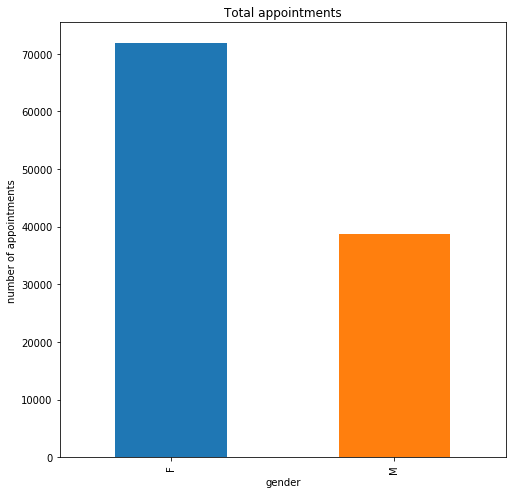

In [91]:
bar_by('gender', 'bar', (8,8), 'gender', 'number of appointments', 'Total appointments')

It is observed that females book more appointments than males.

In [104]:
def countplot( size, x_label , y_label, c, name):
    # A function to draw a countplot
    plt.figure(figsize = size)
    sns.countplot(x = x_label, hue = y_label, data = c)
    plt.title(name)

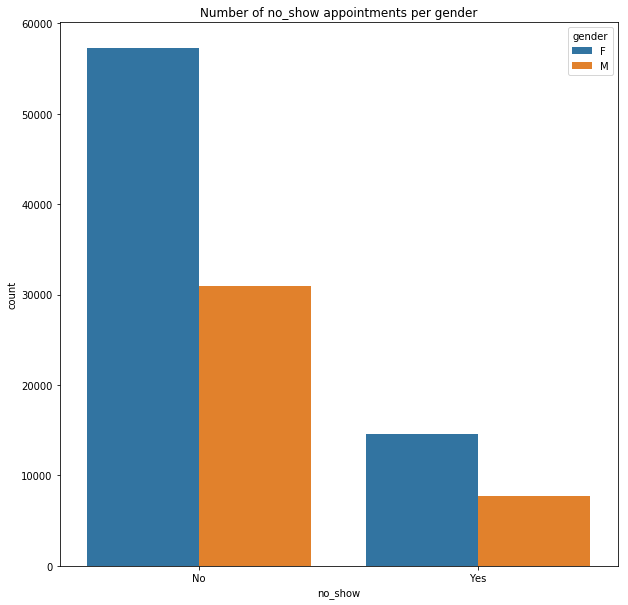

In [105]:
countplot( (10,10),'no_show', 'gender', df, 'Number of no_show appointments per gender' )

#### The chart above shows that the number of missed appointments for both genders is higehr then the number of appointments that patients showed up for. The female gender tops the bar for both the missed appointment and appointments not missed.

In [93]:
# The number of females to males that showed up for their appointment.
df_yes.groupby('gender')['no_show'].count()

gender
F    14594
M     7725
Name: no_show, dtype: int64

In [94]:
# number of missed appointments per gender
df_no.groupby('gender')['no_show'].count()

gender
F    57246
M    30962
Name: no_show, dtype: int64

In [95]:
df.groupby('gender')['scholarship'].count()

gender
F    71840
M    38687
Name: scholarship, dtype: int64

In [96]:
#count of scholarship
df.scholarship.value_counts()

False    99666
True     10861
Name: scholarship, dtype: int64

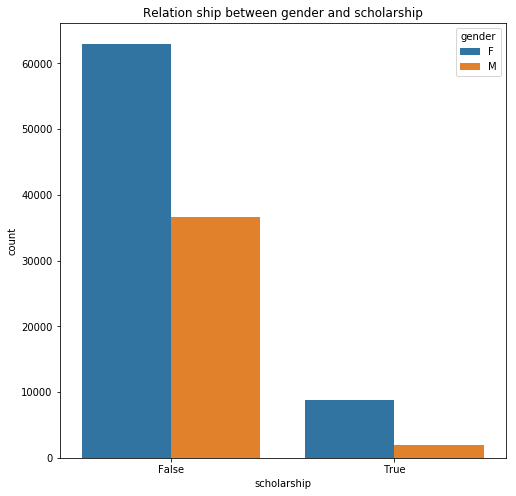

In [106]:
# relationship between gender and scholarship
countplot( (8,8),'scholarship', 'gender', df, 'Relation ship between gender and scholarship' )

### It is observed that very few number of patients received scholarships in total. SInce the number of females to males that booked an appoinment is high, the number of females who received a scholarship should also be higher. This is well represented in the chart above.

## Neighbourhood

In [98]:
# number of appoinments per neiighbourhood
df.neighbourhood.value_counts()

Jardim Camburi                 7717
Maria Ortiz                    5805
Resistência                    4431
Jardim Da Penha                3877
Itararé                        3514
Centro                         3334
Tabuazeiro                     3132
Santa Martha                   3131
Jesus De Nazareth              2853
Bonfim                         2773
Santo Antônio                  2746
Santo André                    2571
Caratoíra                      2565
Jabour                         2509
São Pedro                      2448
Ilha Do Príncipe               2266
Nova Palestina                 2264
Andorinhas                     2262
Da Penha                       2217
Romão                          2215
Gurigica                       2018
São José                       1977
Bela Vista                     1907
Maruípe                        1902
Forte São João                 1889
Ilha De Santa Maria            1885
São Cristóvão                  1836
Redenção                    

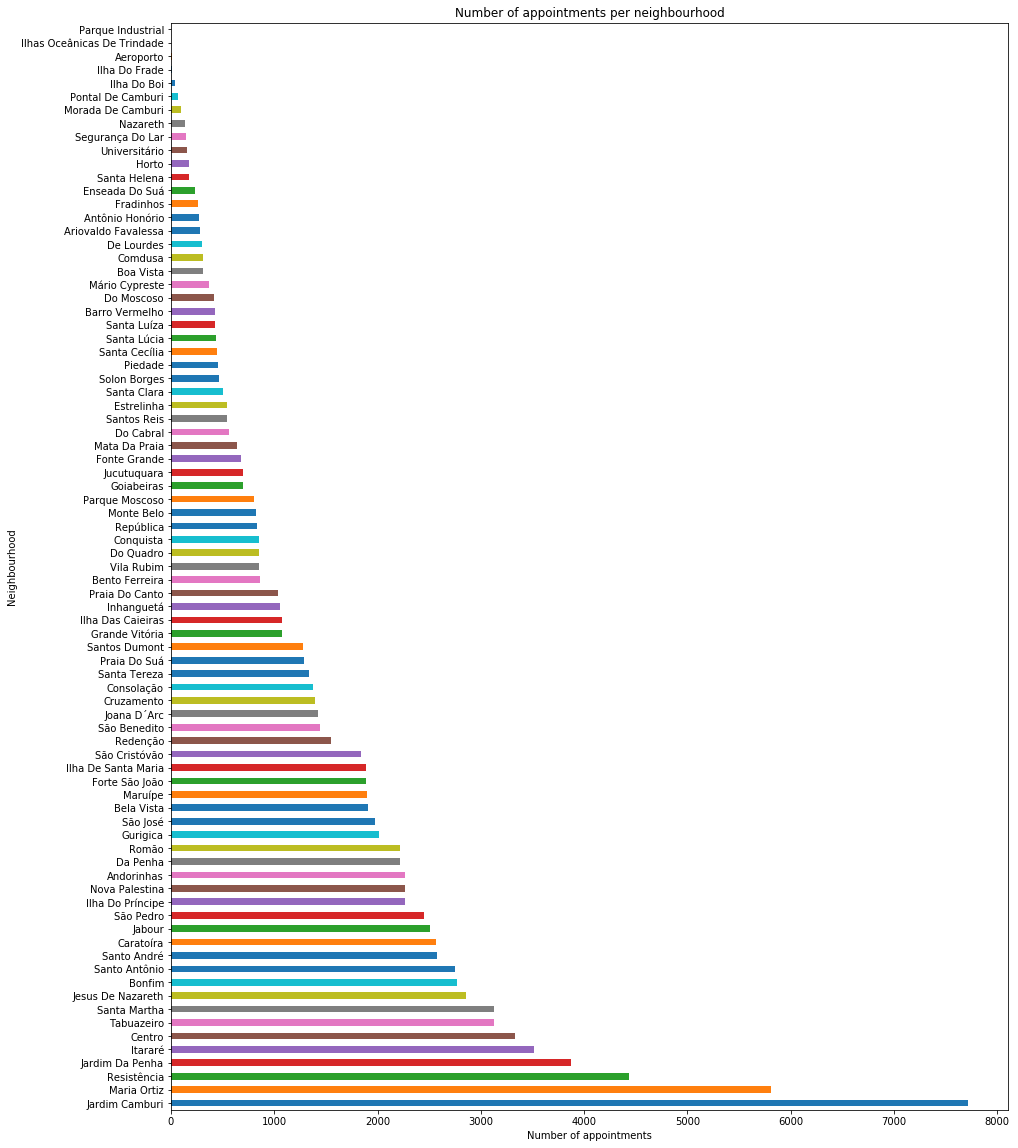

In [100]:
# visualizing number of appointments per neighbourhood
bar_by('neighbourhood', 'barh', (15,20), 'Number of appointments', 'Neighbourhood', 'Number of appointments per neighbourhood')

In [37]:
df_yes['neighbourhood'].value_counts()

Jardim Camburi                 1465
Maria Ortiz                    1219
Itararé                         923
Resistência                     906
Centro                          703
Jesus De Nazareth               696
Jardim Da Penha                 631
Caratoíra                       591
Tabuazeiro                      573
Bonfim                          550
Ilha Do Príncipe                532
Andorinhas                      521
São Pedro                       515
Santo André                     508
Santa Martha                    496
Santo Antônio                   484
Romão                           474
Gurigica                        456
Jabour                          451
Da Penha                        429
São José                        428
Maruípe                         424
Nova Palestina                  402
Bela Vista                      384
Santos Dumont                   369
São Cristóvão                   363
Ilha De Santa Maria             361
Forte São João              

In [38]:
df.query('neighbourhood == "Parque Industrial"')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetic,alcoholic,handicap,sms_received,no_show
75199,8255992453538,F,2016-05-05 10:48:59,2016-05-05,17,Parque Industrial,False,False,False,False,False,False,No


In [39]:
df_yes.query('neighbourhood == "Jardim Camburi"')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetic,alcoholic,handicap,sms_received,no_show
446,24494241866,F,2016-04-08 14:13:23,2016-04-29,60,Jardim Camburi,False,False,False,False,False,True,Yes
448,62818436793537,M,2016-04-11 08:06:06,2016-04-29,12,Jardim Camburi,False,False,False,False,False,True,Yes
575,299778815147872,M,2016-04-20 16:09:23,2016-04-29,23,Jardim Camburi,False,False,False,False,False,True,Yes
610,3385223672972,M,2016-04-28 10:37:09,2016-04-29,48,Jardim Camburi,False,False,False,False,False,False,Yes
1960,975822937729569,M,2016-04-27 10:59:08,2016-04-29,17,Jardim Camburi,False,False,False,False,False,False,Yes
2325,7317142324454,M,2016-04-27 07:03:50,2016-04-29,0,Jardim Camburi,False,False,False,False,False,False,Yes
3125,634733238794218,M,2016-04-27 08:07:33,2016-04-29,12,Jardim Camburi,False,False,False,False,False,False,Yes
3141,64329288796396,F,2016-04-27 15:06:50,2016-04-29,20,Jardim Camburi,False,False,False,False,False,False,Yes
3767,762756363323985,M,2016-05-03 11:58:23,2016-05-05,53,Jardim Camburi,False,False,False,False,False,False,Yes
3869,959494585246699,M,2016-05-10 15:32:53,2016-05-12,52,Jardim Camburi,False,False,False,False,False,False,Yes


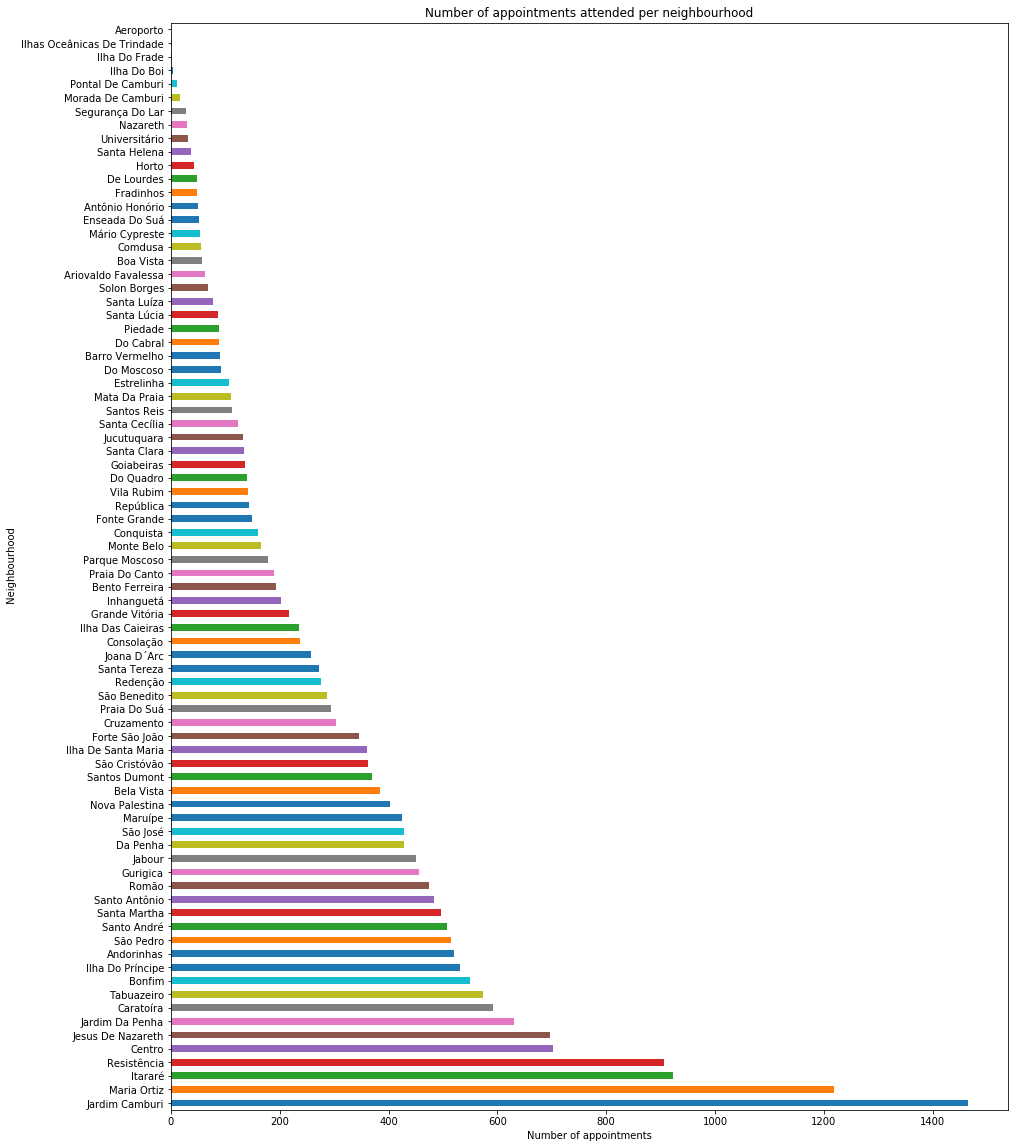

In [40]:
df_yes['neighbourhood'].value_counts().plot(kind ='barh', figsize = (15,20))
plt.ylabel(' Neighbourhood')
plt.xlabel('Number of appointments')
plt.title('Number of appointments attended per neighbourhood')
plt.show()

The neighbourhood with the most attendance for booked appointments is Jardim Camburi. The neighbourhood with the least attendance is Parque Industrial, the analysis also shows that there was no attendance at parque Industrial.

## Age

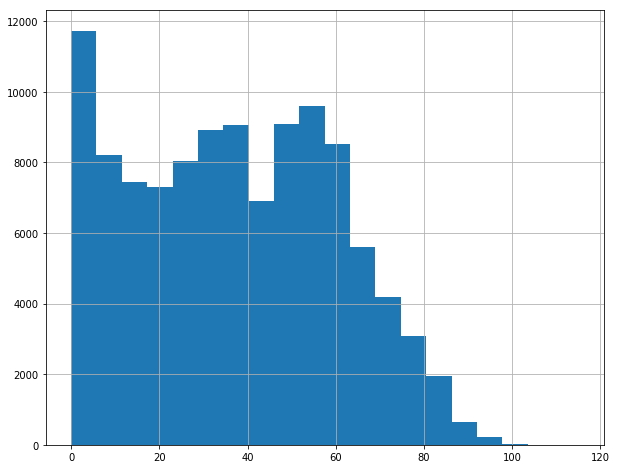

In [41]:
df['age'].hist(figsize = (10,8), bins = 20)

### From the histogram above it can be observed the the  most patients that booked an appointment are in 0-60 age range

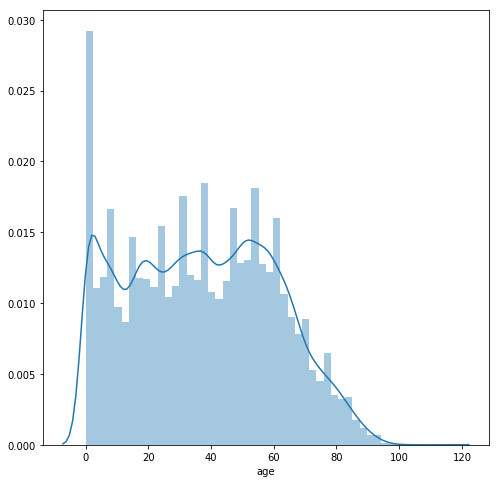

In [42]:
plt.figure(figsize = (8,8))
sns.distplot(df['age'])

gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

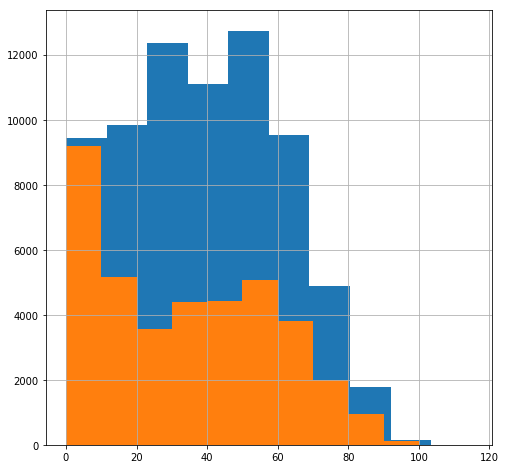

In [43]:
df.groupby('gender')['age'].hist(figsize = (8,8))

In [44]:
df_yes.groupby('gender')['age'].value_counts()

gender  age
F       0      319
        30     291
        19     280
        21     270
        25     268
        22     266
        29     263
        20     262
        23     258
        28     255
        17     249
        18     248
        33     240
        39     240
        31     235
        24     231
        34     230
        36     229
        41     229
        27     227
        26     225
        43     224
        32     223
        38     222
        16     221
        37     221
        15     218
        44     216
        53     213
        49     209
              ... 
M       67      46
        61      45
        71      39
        72      39
        73      34
        76      30
        69      29
        70      28
        80      28
        74      27
        77      27
        78      27
        75      25
        82      25
        83      21
        86      21
        79      19
        81      18
        84      17
        85       9
        89       8


gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

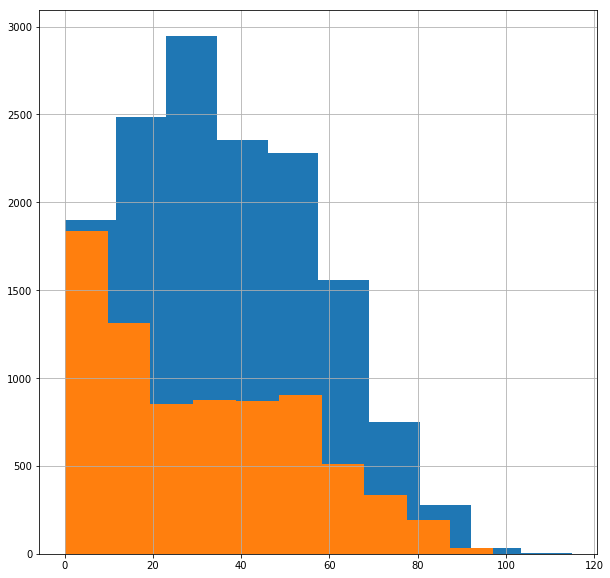

In [45]:
df_yes.groupby('gender')['age'].hist(figsize = (10,10))

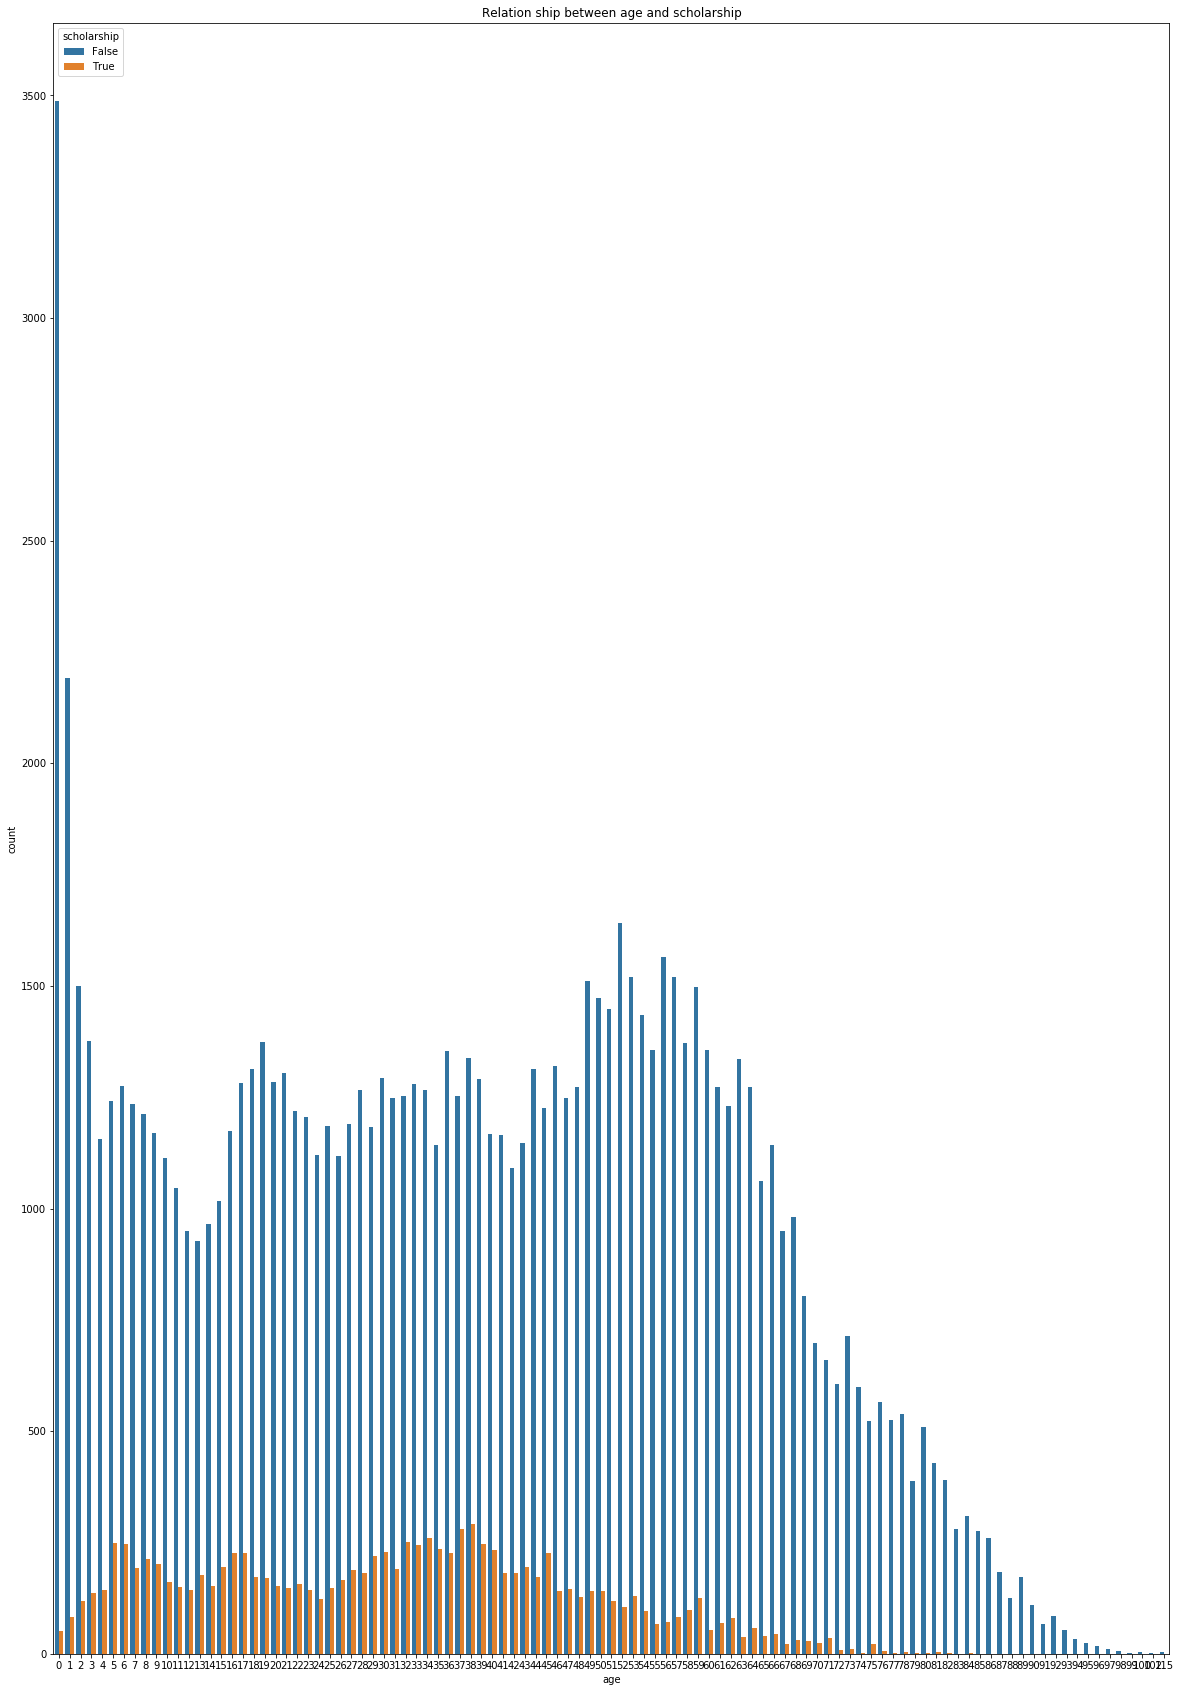

In [108]:
# relationship between age and scholarship
countplot( (20,30), 'age' ,'scholarship', df, 'Relationship between age and scholarship' )


In [47]:
df['age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

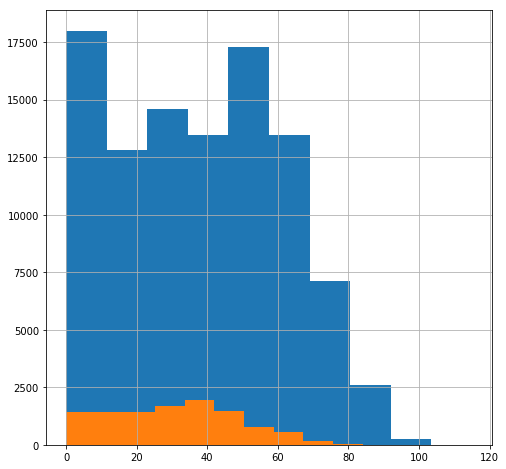

In [48]:
df.groupby('scholarship').age.hist(figsize = (8,8))
plt.legend()

## Correlation between variables

Text(0.5,1,'Correlation of variables')

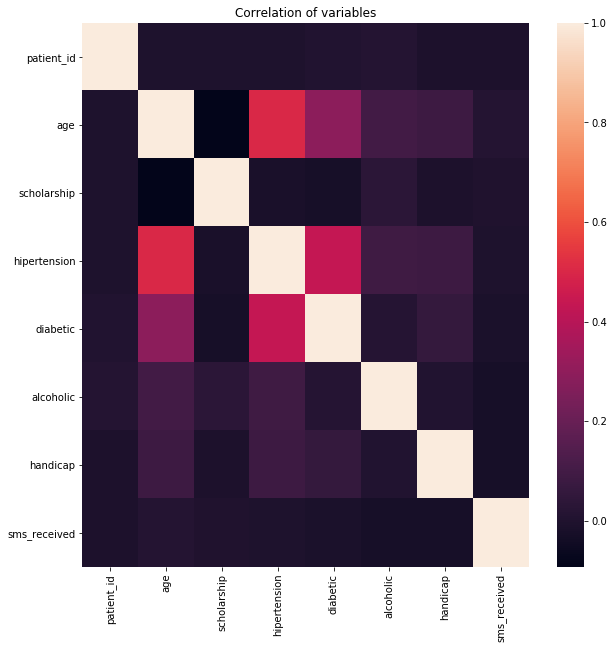

In [110]:
correlation = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation)
plt.title('Correlation of variables')

### What gender and age  show up for appointments ?

Text(0.5,1,'Distribution of age')

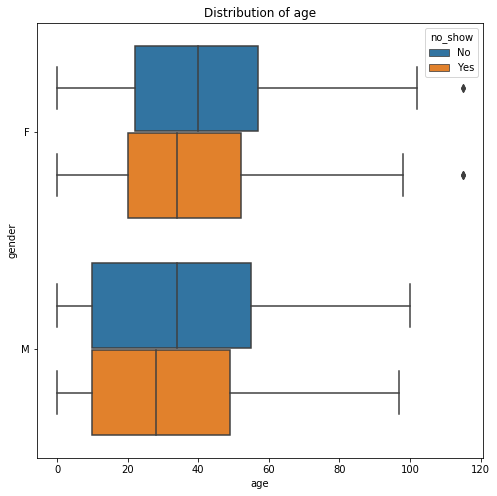

In [118]:
plt.figure(figsize= (8,8))
sns.boxplot(x = 'age' , y = 'gender' , hue = 'no_show', data = df)
plt.title('Distribution of age')

### Are patients who received sms more likely to show up for appointments ?

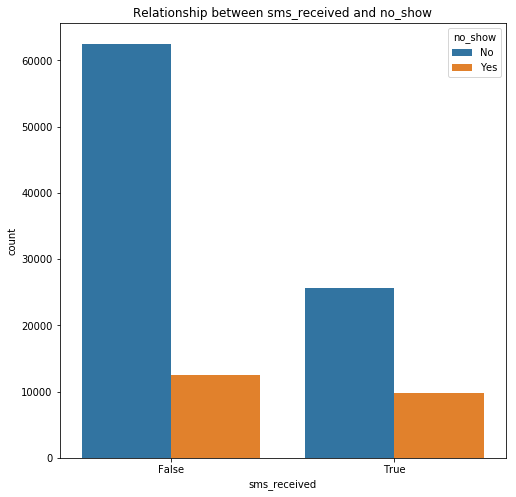

In [109]:
countplot( (8,8), 'sms_received' ,'no_show', df, 'Relationship between sms_received and no_show' )

From the chart above it is observed that very few patients received sms compared to the total number of patients that booked an appointment. The number of patients who didn't show up for appointments having received sms is greater than the number of patients that showed up for appointmnets. It can also be observed that more number of patients who showed up for appointments didn't receive a sms.

## What day of the week are patients most likely to show up for appointments ?

In [52]:
# What does are patients most likely to show up for appointments
df.appointment_day.nunique()

27

Text(0.5,1,'Days patients are most likely to show up or miss an appointment')

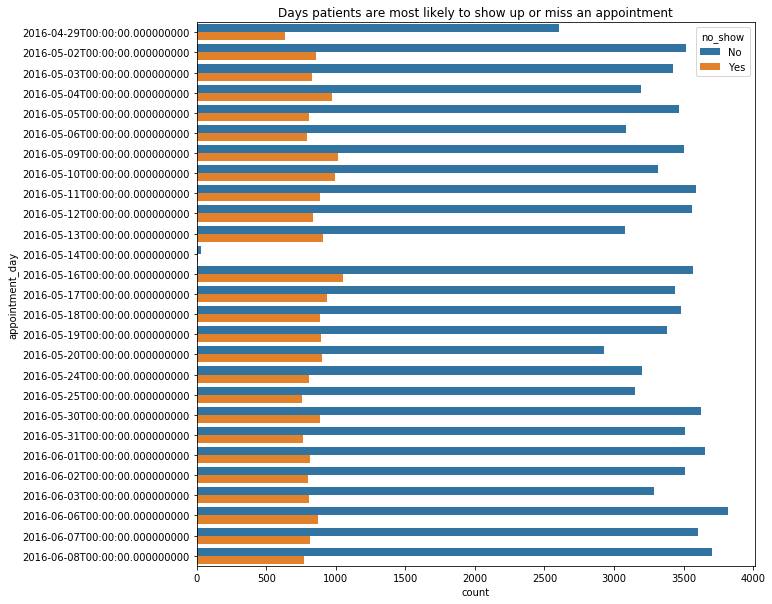

In [117]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'appointment_day', hue = 'no_show', data = df)
plt.title('Days patients are most likely to show up or miss an appointment')

In [113]:
# creatin a column named day; stating the day of the week.
df['day'] = df['appointment_day'].dt.day_name()

In [114]:
df['day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: day, dtype: int64

Text(0.5,1,'Days patients are most likely to show up or miss an appointment')

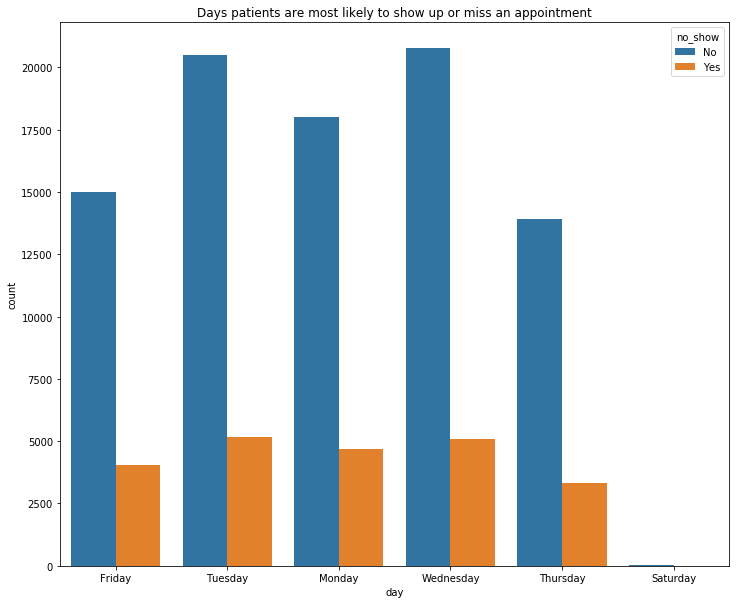

In [116]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'day', hue = 'no_show', data = df)
plt.title('Days patients are most likely to show up or miss an appointment')

It is observed that patients are  most likely to show up for appointments on a tuesday and least likely to show for appointments on a weekend.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

#### From the data visualizations above it is observed that:
- Females book more appointment than men, this might be a reason why more females show up for appointments.
- The age range that showed up for appointment is between 0 - 60 years. There a few outliers in the data.
- More appointments were booked mostly in the Jardim Camburi neighbour hood, it was also observed that patients show up for appointments mostly in the neighbourhood. The least attendacnce for appointment was in Parque industrial, haaniv only one booked appointments and no show apppointments.
- Scholarships are mostly awarded to the female gender than the male gender.
- There is a postive correlation between age and hypertension.
- Females between the age range 20 - 40 years show up for appointments.
- Males between the age range 18- 45 years show up for appointments.
- Most patients are most likely to up for appointments on a weekday than a weekend. Tuesday has the most attendance on a weekday.


## Limitations
From the data, there are outliers in the age column and neighbourhood which could cause a decrease in normality.
There also seems to be little to no correlation among variables as shown in the correlation matrix, making it impossible to show causation. 


In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0